# Importing libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import pandas as pd
import glob

# Read and combine all CitiBike CSVs
trip_files = glob.glob("2022/*.csv")
trip_list = [pd.read_csv(file) for file in trip_files]
citibike_df = pd.concat(trip_list, ignore_index=True)

# Convert to datetime and extract date
citibike_df['started_at'] = pd.to_datetime(citibike_df['started_at'])
citibike_df['date'] = citibike_df['started_at'].dt.date


In [17]:
import json

# Load the NOAA weather JSON file
with open("weather_2022.json", "r") as f:
    weather_data = json.load(f)

# Extract results list
weather_records = weather_data.get('results', [])
weather_raw_df = pd.DataFrame(weather_records)

# Convert date and pivot to wide format
weather_raw_df['date'] = pd.to_datetime(weather_raw_df['date']).dt.date
weather_df = weather_raw_df.pivot_table(
    index='date',
    columns='datatype',
    values='value',
    aggfunc='first'
).reset_index()

# Rename some columns for clarity
weather_df.rename(columns={
    'TMAX': 'max_temp',
    'TMIN': 'min_temp',
    'PRCP': 'precip'
}, inplace=True)


In [19]:
# Merge trips with weather by date
merged_df = citibike_df.merge(weather_df, on='date', how='left')


In [21]:
merged_df.to_csv("citibike_weather_2022.csv", index=False)
print("File saved ✅")


File saved ✅


In [22]:
df = pd.read_csv("citibike_weather_2022.csv")
df['date'] = pd.to_datetime(df['date'])
df.head()


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT04,WT06,WT08,WT09
0,7830EBE775F2EE25,classic_bike,2021-06-21 07:38:42,2021-06-21 10:49:25,Dixon Mills,JC076,NaN,NaN,40.721630,-74.049968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,629A3BFD50BF8392,docked_bike,2021-06-12 10:25:01,2021-06-12 10:35:11,Dixon Mills,JC076,Journal Square,JC103,40.721630,-74.049967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CF02EC434989A99D,docked_bike,2021-06-07 14:52:05,2021-06-07 14:58:25,11 St & Washington St,HB502,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.749984,-74.027150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E1BB8FED29AA5BA1,docked_bike,2021-06-07 08:29:19,2021-06-07 08:34:17,8 St & Washington St,HB603,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.745983,-74.028199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,787C59EE76D96BCA,docked_bike,2021-06-18 14:16:27,2021-06-18 14:26:26,11 St & Washington St,HB502,Columbus Park - Clinton St & 9 St,HB501,40.749984,-74.027150,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Read Data for Visualization

In [25]:
df = pd.read_csv("citibike_weather_2022.csv")
df['date'] = pd.to_datetime(df['date'])


# Line Plot – Max Temperature Over Time

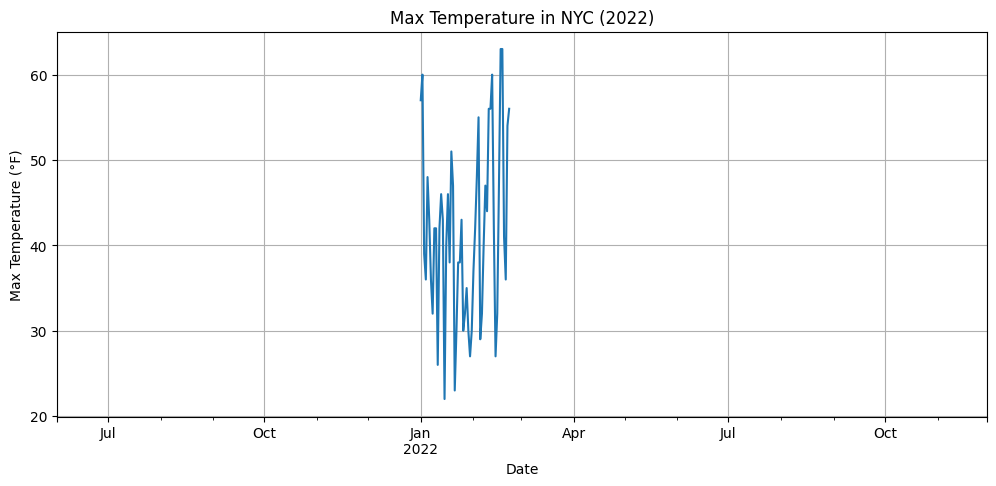

In [29]:
df.groupby('date')['max_temp'].mean().plot(figsize=(12,5), title='Max Temperature in NYC (2022)')
plt.xlabel("Date")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)
plt.show()


# Add Trip Count Per Day and Merge

In [32]:
# Count number of trips per day
trip_counts = df.groupby('date')['ride_id'].count().reset_index()
trip_counts.rename(columns={'ride_id': 'trip_count'}, inplace=True)

# Merge back into the DataFrame
df_daily = df.drop_duplicates(subset='date', keep='first')  # avoid duplicate merge
df_daily = df_daily.merge(trip_counts, on='date')


# Dual-Axis Line Chart – Trips vs. Temperature

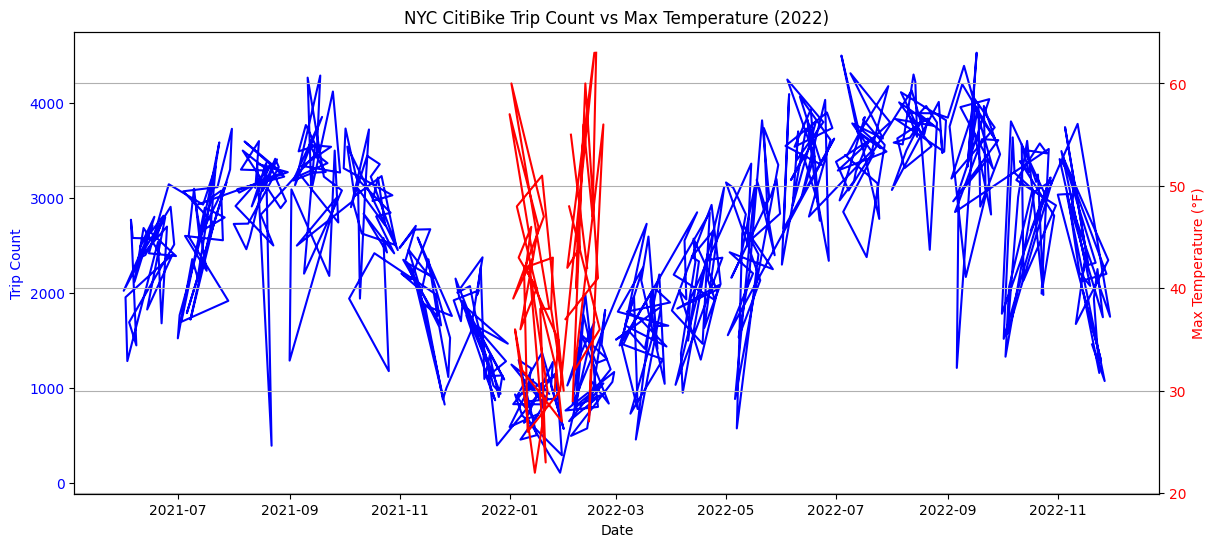

In [35]:
fig, ax1 = plt.subplots(figsize=(14,6))

# Plot trip count
ax1.plot(df_daily['date'], df_daily['trip_count'], color='blue', label='Trip Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Trip Count', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot temperature on secondary axis
ax2 = ax1.twinx()
ax2.plot(df_daily['date'], df_daily['max_temp'], color='red', label='Max Temp')
ax2.set_ylabel('Max Temperature (°F)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('NYC CitiBike Trip Count vs Max Temperature (2022)')
plt.grid(True)
plt.show()


## Explanation

In this notebook, I used Matplotlib and Pandas to analyze CitiBike usage in NYC and its relationship with daily weather in 2022.

- First, I recreated and saved a cleaned, merged dataset of CitiBike trips and NOAA weather data.
- I used Pandas' `.plot()` method (a wrapper over Matplotlib) for quick visualizations.
- For the dual-axis chart, I used Matplotlib's **object-oriented API**, creating `ax1` and `ax2` to plot trip counts and temperatures on separate Y-axes.

This allowed me to visualize how ridership correlates with changes in temperature over time.


In [ ]:
# 